In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('customer_churn_data.csv', delimiter=',')
df.head(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [4]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [5]:
# Contar o total de valores nulos (NaN) em todo o DataFrame
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
# Substitui os valores nulos (NaN) na coluna "InternetService" por uma string vazia
df["InternetService"]= df["InternetService"].fillna("")


In [7]:
# Verificar valores duplicados
df.duplicated().sum()

0

In [8]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [9]:
# Selecionar apenas as colunas numéricas do DataFrame
numeric_columns = df.select_dtypes(include =["number"])

In [10]:
#Visualizar as colunas numéricas
numeric_columns

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [11]:
# Calcular a matriz de correlação entre as colunas numéricas
numeric_columns.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
correla=numeric_columns.corr()

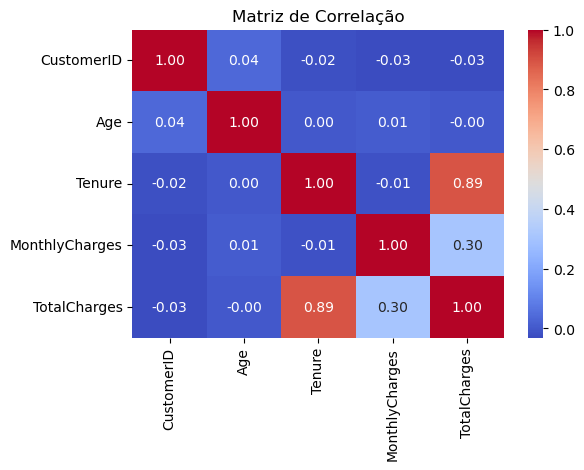

In [13]:
# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correla, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

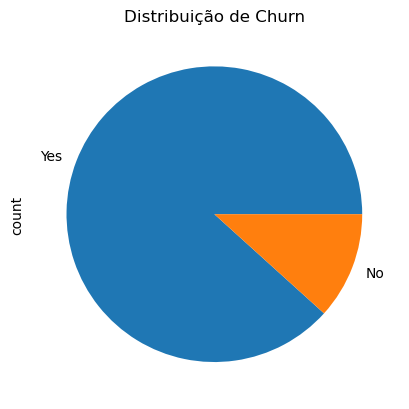

In [14]:
# Distribuição de Churn
df["Churn"].value_counts().plot(kind='pie', color=['brown', 'orange'])
plt.title('Distribuição de Churn')
plt.show()

In [15]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

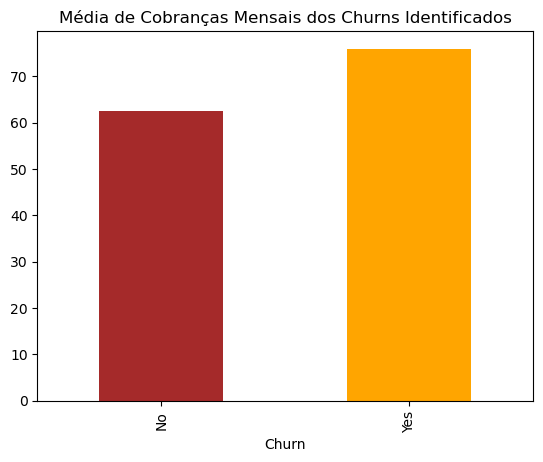

In [17]:
# Média de Cobranças Mensais dos Churns Ideentificados
df.groupby("Churn")["MonthlyCharges"].mean().plot(kind='bar', color=['brown', 'orange'])
plt.title('Média de Cobranças Mensais dos Churns Identificados')
plt.show()

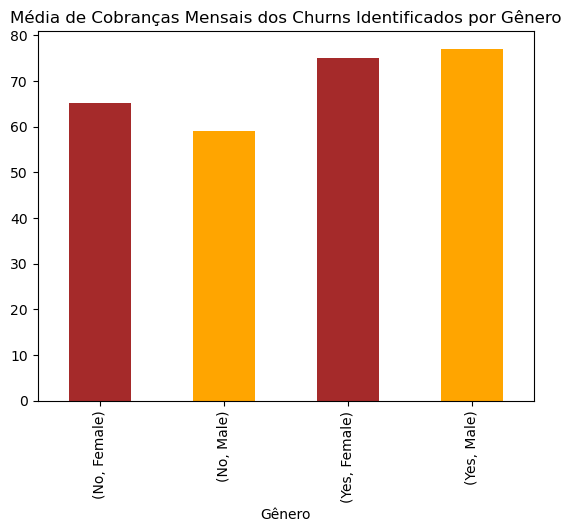

In [18]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean().plot(kind='bar', color=['brown', 'orange'])
plt.title('Média de Cobranças Mensais dos Churns Identificados por Gênero')
plt.xlabel('Gênero')
plt.show()

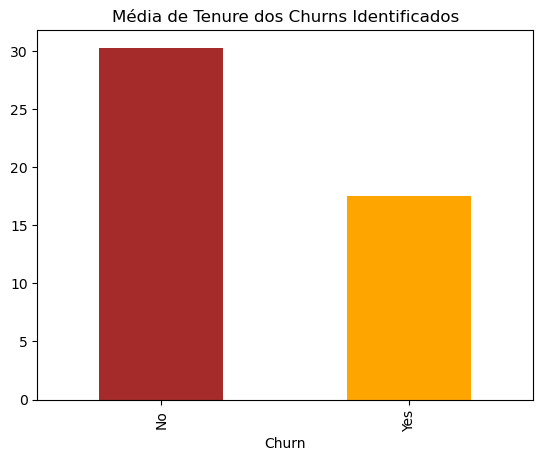

In [19]:
# Média de Tenure dos Churns Identificados
# Tempo médio que os clientes que cancelaram ficaram com a empresa antes de saírem
df.groupby("Churn")["Tenure"].mean().plot(kind='bar', color=['brown', 'orange'])
plt.title('Média de Tenure dos Churns Identificados')
plt.show()

In [20]:
df.head(3)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes


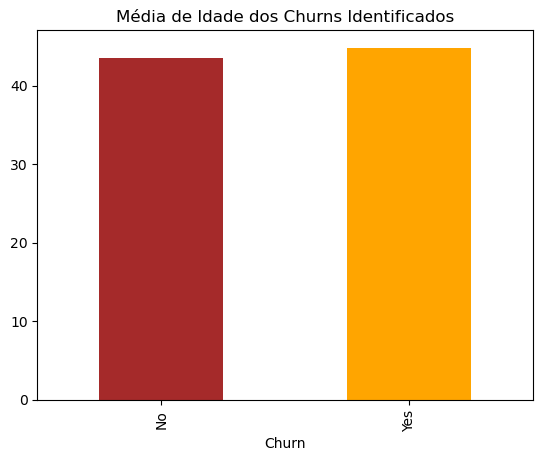

In [21]:
# Média de Idades Sobre os Churns
df.groupby("Churn")["Age"].mean().plot(kind='bar', color=['brown', 'orange'])
plt.title('Média de Idade dos Churns Identificados')
plt.show()

In [22]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

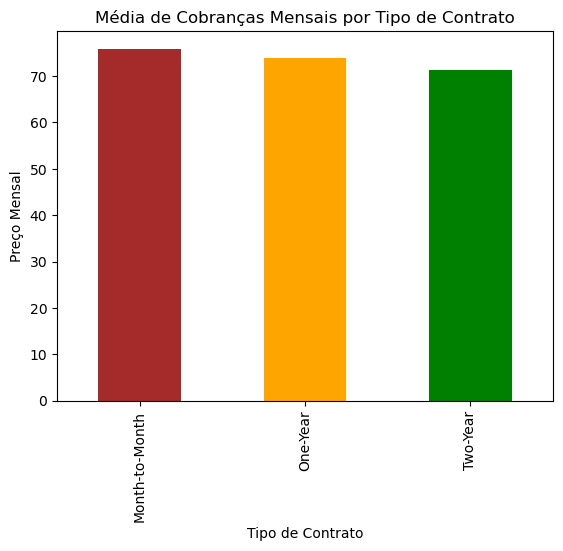

In [23]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar', color=['brown', 'orange', 'green'])
plt.title('Média de Cobranças Mensais por Tipo de Contrato')
plt.xlabel("Tipo de Contrato")
plt.ylabel("Preço Mensal")
plt.show()


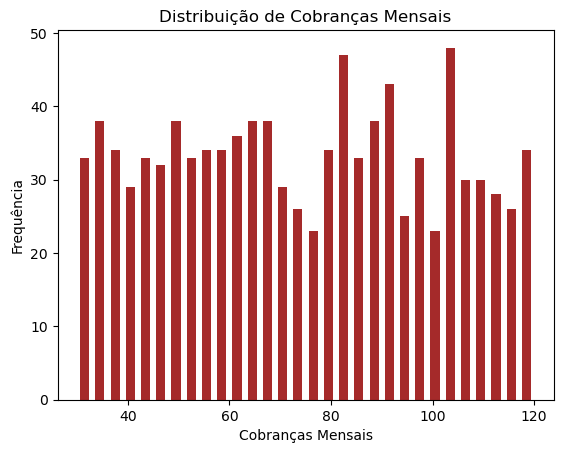

In [24]:
plt.hist(df["MonthlyCharges"], bins=30,  rwidth=0.6, color="brown")
plt.xlabel("Cobranças Mensais")
plt.ylabel("Frequência")
plt.title("Distribuição de Cobranças Mensais")
plt.show()


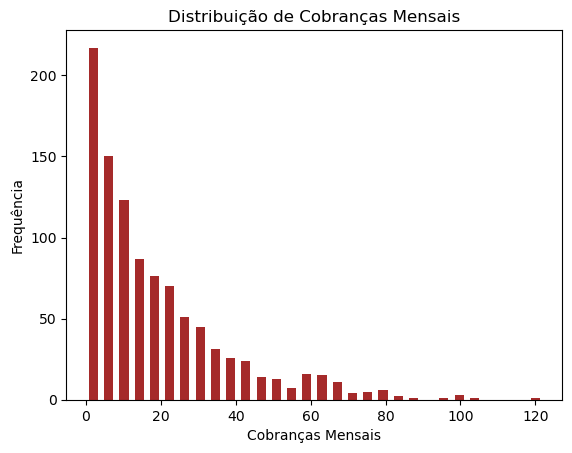

In [25]:
plt.hist(df["Tenure"], bins=30,  rwidth=0.6, color="brown")
plt.xlabel("Cobranças Mensais")
plt.ylabel("Frequência")
plt.title("Distribuição de Cobranças Mensais")
plt.show()

## Features Engineering

In [26]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [27]:
# Selecionar as colunas relevantes para o modelo
# y = variável alvo (Churn Target)
# X = variáveis independentes (features) preditoras
y = df[["Churn"]]
X = df[["Gender","Age", "Tenure", "MonthlyCharges"]]

In [28]:
X

,Gender,Age,Tenure,MonthlyCharges
0,Male,49,4,88.35
1,Male,43,0,36.67
2,Female,51,2,63.79
3,Female,60,8,102.34
4,Male,42,32,69.01
...,...,...,...,...
995,Male,42,41,37.14
996,Male,62,9,80.93
997,Female,51,15,111.72
998,Male,39,68,65.67


In [29]:
# Convertendo a coluna "Gender" para valores numéricos e não categoricos
# 1 para masculino e 0 para feminino
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == 1 else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_1788\2526152703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == 1 else 0)


In [30]:
print(X)

     Gender  Age  Tenure  MonthlyCharges
0         0   49       4           88.35
1         0   43       0           36.67
2         0   51       2           63.79
3         0   60       8          102.34
4         0   42      32           69.01
..      ...  ...     ...             ...
995       0   42      41           37.14
996       0   62       9           80.93
997       0   51      15          111.72
998       0   39      68           65.67
999       0   50       1           56.67

[1000 rows x 4 columns]


In [31]:
X.dtypes

Gender              int64
Age                 int64
Tenure              int64
MonthlyCharges    float64
dtype: object

In [32]:
# Convertendo a coluna "Churn" para valores numéricos
# 1 para "Yes" e 0 para "No"
y["Churn"]= y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_1788\1192991030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"]= y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [33]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [34]:
# Importar a função train_test_split do scikit-learn para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Importar o StandardScaler do scikit-learn para normalizar os dados
from sklearn.preprocessing import StandardScaler

In [36]:
# Padronizar os dados de treinamento
# Isso é importante para muitos algoritmos de aprendizado de máquina, especialmente aqueles que usam distâncias
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
# Salvar o scaler para uso posterior
# Faz com que os dados de teste sejam transformados da mesma forma que os dados de treinamento
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [38]:
X_test =scaler.fit_transform(X_test)

Finalizamos Assim Nosso Escalonamento de Dados (Padronização)

In [39]:
from sklearn.metrics import accuracy_score 

# Função para calcular a performance do modelo 
# Para obter a pontuaçao de precisão com as previsões do modelo, pode usar a função accuracy_score do sklearn
def modelperfomance(predictions):
    print("A accuracy do modelo é: ", accuracy_score(y_test, predictions))

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()

# Inicio de Treino do Modelo

Como não quero ter informações sobre erros ou bibliotecas obsoletas prefiro usar esta bibliotca

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Obter a predição do modelo
y_predictions = log_model.predict(X_test)

In [45]:
# Exibir as predições
print("Predições do modelo Para o Teste X : ", y_predictions)

Predições do modelo Para o Teste X :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
modelperfomance(y_predictions)

A accuracy do modelo é:  0.885


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Definir os parâmetros para o GridSearchCV
# Este dicionário contém os hiperparâmetros que serão ajustados
# durante a busca em grade (Grid Search)
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [49]:
# Realizar a busca em grade (Grid Search) para encontrar os melhores hiperparâmetros
gridKN= GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy')

In [50]:
gridKN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
gridKN.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [52]:
y_predic = gridKN.predict(X_test)
print("Predições do modelo Para o Teste X : ", y_predic)

Predições do modelo Para o Teste X :  [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [53]:
modelperfomance(y_predic)

A accuracy do modelo é:  0.86


In [54]:
from sklearn.svm import SVC

In [55]:
svm = SVC()

In [56]:
parametro_grid ={
    "C": [0.01, 0.1,0.5,1],
    "kernel": ["linear", "rbf", "poly"]
}

In [57]:
# Importar a classe GridSearchCV do scikit-learn para realizar a busca em grade
gridsvc = GridSearchCV(svm, parametro_grid, cv=5)

In [58]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [59]:
# Exibir os melhores parâmetros encontrados pelo GridSearchCV
print("Melhores parâmetros encontrados pelo GridSearchCV: ", gridsvc.best_params_)

Melhores parâmetros encontrados pelo GridSearchCV:  {'C': 0.01, 'kernel': 'linear'}


In [60]:
y_predic = gridsvc.predict(X_test)

In [61]:
# Exibir as predições do modelo
modelperfomance(y_predic)

A accuracy do modelo é:  0.885


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
parametros_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [64]:
grid_tree= GridSearchCV(DecisionTreeClassifier(), parametros_grid, cv=5)

In [65]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [66]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [67]:
y_predic = grid_tree.predict(X_test)

In [68]:
y_predic

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [69]:
# Exibir as predições do modelo
modelperfomance(y_predic)

A accuracy do modelo é:  0.875


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [71]:
param_grid={
    "n_estimators" : [32,64, 128, 256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [72]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [73]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [74]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [75]:
y_predic = grid_rfc.predict(X_test)

In [76]:
modelperfomance(y_predic)

A accuracy do modelo é:  0.86


In [77]:
# O melhor modelo encontrado pelo GridSearchCV
gridsvc.best_estimator_

SVC(C=0.01, kernel='linear')

In [78]:
best_model = gridsvc.best_estimator_

In [79]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [80]:
X.columns

Index(['Gender', 'Age', 'Tenure', 'MonthlyCharges'], dtype='object')